# Airline Data Analytics for Profitability & Occupancy Optimization

**Objective:**  
Analyze airline operational data to improve aircraft occupancy rates and maximize profit per seat under rising operational costs.

**Tools & Technologies:**  
Python, SQLite, Pandas, Matplotlib, Seaborn

## Business Problem

The airline industry is facing multiple challenges:
- Stricter environmental regulations
- Higher flight taxes
- Increased labor costs
- Rising fuel prices

These factors reduce profitability and limit expansion.  
Data-driven insights are required to optimize occupancy rates and improve revenue per seat.


## Data Source

The analysis uses a SQLite database (`travel.sqlite`) containing airline operational data such as:
- Flight details
- Routes
- Passenger information
- Revenue and cost metrics


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Database Exploration

In [2]:
con=sqlite3.connect('travel.sqlite')
cursor=con.cursor()

In [3]:
query='''
    select name from sqlite_master where type='table'
'''

In [4]:
cursor.execute("""select name from sqlite_master where type='table'""")
table_list=[table[0] for table in cursor.fetchall()]
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

## Available Tables

In [5]:
table=pd.read_sql_query(query,con)

In [6]:
table

,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


## Table Schemas

In [7]:
aircrafts_data=pd.read_sql_query('select * from aircrafts_data',con)

In [8]:
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [9]:
airports_data=pd.read_sql_query('select * from airports_data',con)

In [10]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [11]:
boarding_passes=pd.read_sql_query('select * from boarding_passes',con)

In [12]:
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [13]:
bookings=pd.read_sql_query('select * from bookings',con)

In [14]:
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [15]:
flights=pd.read_sql_query('select * from flights',con)

In [16]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [17]:
seats=pd.read_sql_query('select * from seats',con)

In [18]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [19]:
ticket_flights=pd.read_sql_query('select * from ticket_flights',con)

In [20]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [21]:
tickets=pd.read_sql_query('select * from tickets',con)

In [22]:
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


## Data Quality & Validation

Before performing analysis, basic data validation checks were conducted to ensure
accuracy and reliability of insights.

---

In [23]:
tables_list = [
    aircrafts_data,
    airports_data,
    boarding_passes,
    bookings,
    flights,
    seats,
    ticket_flights,
    tickets
]

for t in tables_list:
    print()
    t.info()
    print("="*50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airport_code  104 non-null    object
 1   airport_name  104 non-null    object
 2   city          104 non-null    object
 3   coordinates   104 non-null    object
 4   timezone      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579686 entries, 0 to 579685
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   --

### Missing Values Check
---

In [24]:
for t in tables_list:
    print(t.isna().sum())
    print('*'*30)

aircraft_code    0
model            0
range            0
dtype: int64
******************************
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64
******************************
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64
******************************
book_ref        0
book_date       0
total_amount    0
dtype: int64
******************************
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64
******************************
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64
******************************
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64
******************************
ticket_no       0
book_ref

### Data Type Validation
---

In [25]:
for t in tables_list:
    print(t.dtypes)
    print('*'*30)

aircraft_code    object
model            object
range             int64
dtype: object
******************************
airport_code    object
airport_name    object
city            object
coordinates     object
timezone        object
dtype: object
******************************
ticket_no      object
flight_id       int64
boarding_no     int64
seat_no        object
dtype: object
******************************
book_ref        object
book_date       object
total_amount     int64
dtype: object
******************************
flight_id               int64
flight_no              object
scheduled_departure    object
scheduled_arrival      object
departure_airport      object
arrival_airport        object
status                 object
aircraft_code          object
actual_departure       object
actual_arrival         object
dtype: object
******************************
aircraft_code      object
seat_no            object
fare_conditions    object
dtype: object
******************************
ticket_n

### Logical Consistency Checks
---

In [26]:
for t in tables_list:
    print(t.describe(include='object'))
    print('='*80)

       aircraft_code                                            model
count              9                                                9
unique             9                                                9
top              773  {"en": "Boeing 777-300", "ru": "Боинг 777-300"}
freq               1                                                1
       airport_code                               airport_name  \
count           104                                        104   
unique          104                                        104   
top             YKS  {"en": "Yakutsk Airport", "ru": "Якутск"}   
freq              1                                          1   

                                    city  \
count                                104   
unique                               101   
top     {"en": "Moscow", "ru": "Москва"}   
freq                                   3   

                                  coordinates       timezone  
count                              

### Duplicate Records Check
---

In [27]:
for t in tables_list:
    print(t.duplicated)
    print()
    print('*'*100)

<bound method DataFrame.duplicated of   aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
5           319  {"en": "Airbus A319-100", "ru": "Аэробус A319-...   6700
6           733    {"en": "Boeing 737-300", "ru": "Боинг 737-300"}   4200
7           CN1  {"en": "Cessna 208 Caravan", "ru": "Сессна 208...   1200
8           CR2  {"en": "Bombardier CRJ-200", "ru": "Бомбардье ...   2700>

****************************************************************************************************
<bound method DataFrame.duplicated of     airport_code                                       airport_name  \
0         

### Question 1: What tables are available in the database?

**Approach:**  
We query the SQLite system catalog to identify all tables present in the database.


In [28]:
query='''
select name 
from sqlite_master 
where type='table';
'''

tables=pd.read_sql(query,con)
tables

,name
0,aircrafts_data
1,airports_data
2,boarding_passes
3,bookings
4,flights
5,seats
6,ticket_flights
7,tickets


**Insight:**  
The database consists of 8 tables covering aircraft information, airports, flights,
bookings, tickets, seat allocation, and boarding passes. Together, these tables
provide end-to-end visibility into airline operations, passenger flow, and revenue
generation.


### Question 2: What is the schema of each table?

**Approach:**  
We use SQLite PRAGMA statements to examine the structure and columns of each table.


In [29]:
for t in tables.name:
    print('\n Table :',t)
    print('-'*40)
    
    columns_info=con.execute(f'PRAGMA table_info({t})')
    
    for col in columns_info.fetchall():
        print(f"Column: {col[1]} | Type: {col[2]}")


 Table : aircrafts_data
----------------------------------------
Column: aircraft_code | Type: character(3)
Column: model | Type: jsonb
Column: range | Type: INTEGER

 Table : airports_data
----------------------------------------
Column: airport_code | Type: character(3)
Column: airport_name | Type: jsonb
Column: city | Type: jsonb
Column: coordinates | Type: point
Column: timezone | Type: TEXT

 Table : boarding_passes
----------------------------------------
Column: ticket_no | Type: character(13)
Column: flight_id | Type: INTEGER
Column: boarding_no | Type: INTEGER
Column: seat_no | Type: character varying(4)

 Table : bookings
----------------------------------------
Column: book_ref | Type: character(6)
Column: book_date | Type: timestamp with time zone
Column: total_amount | Type: numeric(10,2)

 Table : flights
----------------------------------------
Column: flight_id | Type: INTEGER
Column: flight_no | Type: character(6)
Column: scheduled_departure | Type: timestamp with tim

**Insight:**  
The schema inspection reveals well-structured relational tables with clear identifiers
such as flight IDs, ticket numbers, and aircraft codes. These relationships enable
detailed analysis of flight operations, seat occupancy, and revenue generation.


### Question 3: What is the total number of flights operated?

**Approach:**  
We count the total number of unique flights using the flights table, which stores
individual flight records.


In [30]:
query='''
select count(*) as total_flights
from flights
'''
total_flights=pd.read_sql(query,con)
total_flights

,total_flights
0,33121


**Insight:**  
The dataset contains a total of 33121 flights, providing a sufficiently large sample
to analyze operational performance, occupancy patterns, and profitability trends.


### Question 4: What is the average aircraft occupancy rate?

**Approach:**  
We calculate occupancy by dividing the number of boarded passengers by the total
seat capacity of the aircraft assigned to each flight, and then compute the average
occupancy rate across all flights.


#### Understanding Aircraft Seat Capacity

In [31]:
query='''
select aircraft_code,count(*) as total_seats
from seats
group by aircraft_code;
'''
seating_capacity=pd.read_sql(query,con)
seating_capacity

,aircraft_code,total_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


### Understanding Passenger Count per Flight

In [32]:
query='''
select flight_id,count(*) as boarded_passengers
from boarding_passes
group by flight_id
'''
passenger_count=pd.read_sql(query,con)
passenger_count

,flight_id,boarded_passengers
0,1,79
1,2,101
2,3,97
3,17,101
4,18,96
...,...,...
11513,33115,20
11514,33116,17
11515,33117,16
11516,33118,16


In [33]:
flights_df=pd.read_sql('select flight_id,aircraft_code from flights',con)
flights_df

,flight_id,aircraft_code
0,1185,319
1,3979,CR2
2,4739,763
3,5502,763
4,6938,SU9
...,...,...
33116,33117,CR2
33117,33118,CR2
33118,33119,CR2
33119,33120,CR2


In [34]:
flight_passengers=flights_df.merge(
    passenger_count,
    on='flight_id',
    how='inner'
)
flight_passengers.head()

,flight_id,aircraft_code,boarded_passengers
0,1,321,79
1,2,321,101
2,3,321,97
3,17,321,101
4,18,321,96


In [35]:
flight_occupancy=flight_passengers.merge(
    seating_capacity,
    on='aircraft_code',
    how='inner'
)
flight_occupancy.head()

,flight_id,aircraft_code,boarded_passengers,total_seats
0,1,321,79,170
1,2,321,101,170
2,3,321,97,170
3,17,321,101,170
4,18,321,96,170


In [36]:
flight_occupancy['occupancy_rate']=flight_occupancy['boarded_passengers'] / flight_occupancy['total_seats'] * 100
flight_occupancy.head()

,flight_id,aircraft_code,boarded_passengers,total_seats,occupancy_rate
0,1,321,79,170,46.470588
1,2,321,101,170,59.411765
2,3,321,97,170,57.058824
3,17,321,101,170,59.411765
4,18,321,96,170,56.470588


In [37]:
avg_occupancy=flight_occupancy['occupancy_rate'].mean()
avg_occupancy

np.float64(51.30943236746014)

**Insight:**  
The average aircraft occupancy rate across all flights is approximately **51.3%**.
This indicates the airline’s overall seat utilization efficiency. Even a small
increase in this metric can significantly improve profitability without increasing
operational costs.


### Question 5: Which routes have the highest and lowest aircraft occupancy rates?

**Approach:**  
We calculate the average occupancy rate for each route by grouping flights based on
departure and arrival airports and then compare route-level occupancy performance.


In [38]:
route_info=pd.read_sql('select flight_id, departure_airport, arrival_airport from flights',con)
route_info.head()

,flight_id,departure_airport,arrival_airport
0,1185,DME,BTK
1,3979,VKO,HMA
2,4739,VKO,AER
3,5502,SVO,UFA
4,6938,SVO,ULV


In [39]:
route_occupancy=flight_occupancy.merge(route_info,on='flight_id',how='inner')
route_occupancy.head()

,flight_id,aircraft_code,boarded_passengers,total_seats,occupancy_rate,departure_airport,arrival_airport
0,1,321,79,170,46.470588,DME,LED
1,2,321,101,170,59.411765,DME,LED
2,3,321,97,170,57.058824,DME,LED
3,17,321,101,170,59.411765,DME,LED
4,18,321,96,170,56.470588,DME,LED


In [40]:
route_summary=(
    route_occupancy.groupby
        (['departure_airport','arrival_airport'])['occupancy_rate']
        .mean()
        .reset_index()
        .sort_values('occupancy_rate',ascending=False))

route_summary.head()

,departure_airport,arrival_airport,occupancy_rate
233,NOZ,KJA,97.916667
33,CEE,LED,95.833333
97,EGO,AAQ,94.982818
363,SVX,SCW,93.771712
333,SVO,NNM,93.225806


In [41]:
Top5_routes=route_summary.head(5)
Top5_routes

,departure_airport,arrival_airport,occupancy_rate
233,NOZ,KJA,97.916667
33,CEE,LED,95.833333
97,EGO,AAQ,94.982818
363,SVX,SCW,93.771712
333,SVO,NNM,93.225806


In [42]:
Bottom5_routes=route_summary.tail(5)
Bottom5_routes

,departure_airport,arrival_airport,occupancy_rate
234,NOZ,KRR,7.692308
381,UCT,TJM,6.857143
374,TJM,UCT,5.444444
269,OVS,UFA,5.419355
198,MJZ,IKT,4.482759


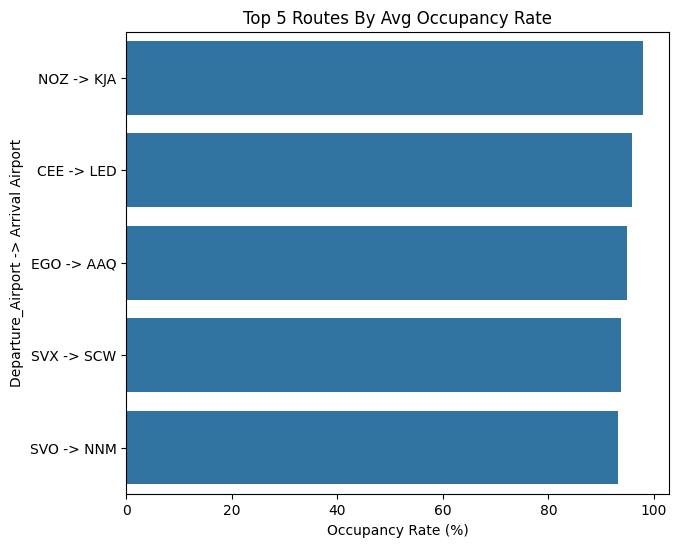

In [43]:
plt.figure(figsize=(7,6))
plt.title('Top 5 Routes By Avg Occupancy Rate')
plt.ylabel('Departure_Airport -> Arrival Airport')
plt.xlabel('Occupancy Rate (%)')
sns.barplot(
    data=Top5_routes,
    x=Top5_routes['occupancy_rate'],
    y=Top5_routes['departure_airport']+' -> '+Top5_routes['arrival_airport']
)
plt.show()

**Insight:**  
The routes **NOZ → KJA**, **CEE → LED**, **EGO → AAQ**, **SVX → SCW**, and **SVO → NNM**
demonstrate exceptionally high average occupancy rates (above 93%), indicating very
strong and consistent passenger demand. These routes are highly efficient in seat
utilization and represent core revenue-generating connections. The airline can
consider capacity expansion, increased flight frequency, or dynamic pricing strategies
on these routes to further enhance profitability.


## Revenue & Profitability Analysis

### Question 6: What is the average revenue generated per flight?


**Approach:**  
We calculate total ticket revenue for each flight using the ticket_flights table
and then compute the average revenue across all flights.


In [44]:
ticket_flights.head(5)

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [45]:
flight_revenue=pd.read_sql('''
    select flight_id, sum(amount) as total_revenue
    from ticket_flights 
    group by flight_id;    
''',con)


flight_revenue.head(5)

,flight_id,total_revenue
0,1,693700
1,2,867700
2,3,853600
3,5,800800
4,6,868300


In [46]:
avg_revenue=flight_revenue['total_revenue'].mean()

In [47]:
avg_revenue

np.float64(934355.3000989832)

**Insight:**  
The average revenue generated per flight is approximately **₹934355**, providing a
baseline understanding of the airline’s revenue performance per operation. Improving
occupancy rates or ticket pricing on high-demand routes can further enhance this metric.


### Question 7: Which routes generate the highest revenue per seat?

**Approach:**  
We calculate total ticket revenue per route and divide it by the total number of
seats occupied on that route to identify routes that generate the highest revenue
per seat.


In [48]:
flight_revenue.head()

,flight_id,total_revenue
0,1,693700
1,2,867700
2,3,853600
3,5,800800
4,6,868300


In [49]:
revenue_routes=flight_revenue.merge(route_info,on='flight_id',how='inner')
revenue_routes.head()

,flight_id,total_revenue,departure_airport,arrival_airport
0,1,693700,DME,LED
1,2,867700,DME,LED
2,3,853600,DME,LED
3,5,800800,DME,LED
4,6,868300,DME,LED


In [50]:
passengers_route=passenger_count.merge(route_info,on='flight_id',how='inner')
passengers_route.head()

,flight_id,boarded_passengers,departure_airport,arrival_airport
0,1,79,DME,LED
1,2,101,DME,LED
2,3,97,DME,LED
3,17,101,DME,LED
4,18,96,DME,LED


In [51]:
route_revenue=(
    revenue_routes.groupby(['departure_airport','arrival_airport'])['total_revenue']
    .sum()
    .reset_index()
)
route_revenue.head()

,departure_airport,arrival_airport,total_revenue
0,AAQ,EGO,33617400
1,AAQ,SVO,76468400
2,ABA,DME,43620400
3,ABA,OVB,2534600
4,ABA,TOF,2391200


In [52]:
route_passengers=(
    passengers_route.groupby(['departure_airport','arrival_airport'])['boarded_passengers']
    .sum()
    .reset_index()
)

route_passengers.head()

,departure_airport,arrival_airport,boarded_passengers
0,AAQ,EGO,1961
1,AAQ,SVO,2981
2,ABA,DME,466
3,ABA,OVB,217
4,ABA,TOF,258


In [53]:
route_perf=route_revenue.merge(
    route_passengers,
    on=['departure_airport','arrival_airport'],
    how='inner'
)

route_perf.head()

,departure_airport,arrival_airport,total_revenue,boarded_passengers
0,AAQ,EGO,33617400,1961
1,AAQ,SVO,76468400,2981
2,ABA,DME,43620400,466
3,ABA,OVB,2534600,217
4,ABA,TOF,2391200,258


In [54]:
route_perf['revenue_per_seat']=(
    route_perf['total_revenue'] / route_perf['boarded_passengers']
)

route_perf_sorted=route_perf.sort_values(
    'revenue_per_seat',
    ascending=False
)

route_perf_sorted.head()

,departure_airport,arrival_airport,total_revenue,boarded_passengers,revenue_per_seat
96,DYR,SVO,19147800,64,299184.375000
106,GDX,MRV,18506100,69,268204.347826
284,PKC,DME,121439600,710,171041.690141
435,VKO,VVO,156057700,935,166906.631016
409,UUS,SVO,222214400,1343,165461.206255


In [55]:
top5_revenue_per_seat=route_perf_sorted.head(5)
top5_revenue_per_seat

,departure_airport,arrival_airport,total_revenue,boarded_passengers,revenue_per_seat
96,DYR,SVO,19147800,64,299184.375000
106,GDX,MRV,18506100,69,268204.347826
284,PKC,DME,121439600,710,171041.690141
435,VKO,VVO,156057700,935,166906.631016
409,UUS,SVO,222214400,1343,165461.206255


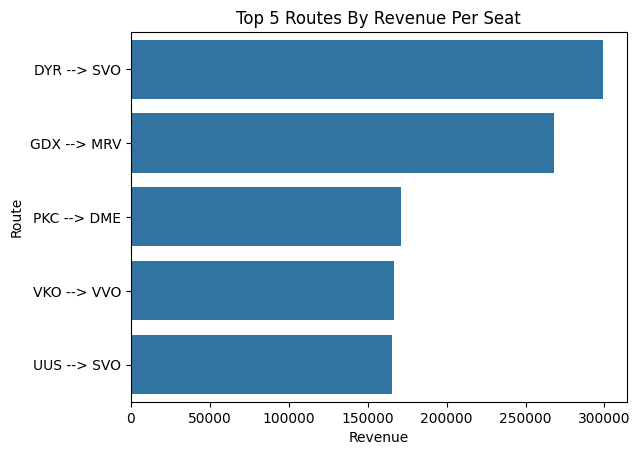

In [56]:
plt.title('Top 5 Routes By Revenue Per Seat')
plt.xlabel('Revenue')
plt.ylabel('Route')
sns.barplot(
    data=top5_revenue_per_seat,
    x='revenue_per_seat',
    y=top5_revenue_per_seat['departure_airport'] + ' --> ' + top5_revenue_per_seat['arrival_airport']
)
plt.show()

**Insight:**  
The routes **DYR → SVO** and **GDX → MRV** generate exceptionally high revenue per seat
despite relatively lower passenger volumes, indicating strong ticket pricing and
potentially premium or long-haul demand characteristics. Routes such as **PKC → DME**,
**VKO → VVO**, and **UUS → SVO** combine high passenger volumes with strong per-seat
revenue, making them critical contributors to overall profitability. These routes
should be prioritized for capacity optimization, pricing strategy refinement, and
premium service expansion.


### Question 8: What is the average revenue contribution per seat?

**Approach:**  
Since operational cost data is not available, revenue per seat is used as a proxy
metric to understand per-seat financial contribution. Ticket-level revenue is
aggregated and divided by the number of boarded passengers.


In [68]:
flight_revenue.head()

,flight_id,total_revenue
0,1,693700
1,2,867700
2,3,853600
3,5,800800
4,6,868300


In [69]:
revenue_per_seat=flight_revenue.merge(
    passenger_count,
    on='flight_id'
)

In [70]:
revenue_per_seat.head(5)

,flight_id,total_revenue,boarded_passengers
0,1,693700,79
1,2,867700,101
2,3,853600,97
3,17,933600,101
4,18,834200,96


In [71]:
revenue_per_seat['revenue_per_seat']=(
    revenue_per_seat['total_revenue'] 
    / 
    revenue_per_seat['boarded_passengers']
)

revenue_per_seat.head()

,flight_id,total_revenue,boarded_passengers,revenue_per_seat
0,1,693700,79,8781.012658
1,2,867700,101,8591.089109
2,3,853600,97,8800.000000
3,17,933600,101,9243.564356
4,18,834200,96,8689.583333


In [76]:
avg_revenue_per_seat=revenue_per_seat['revenue_per_seat'].mean()
avg_revenue_per_seat

np.float64(17448.473162463837)

**Insight:**  
Due to the absence of operational cost data, revenue per seat is used as a proxy for
unit-level financial performance. The average revenue contribution per seat provides
a clear indication of pricing effectiveness and demand quality across flights.
However, incorporating cost data would be required to assess true profitability.


### Question 9: Which routes should be prioritized to improve overall performance?


**Approach:**  
Route-level occupancy and revenue-per-seat metrics were jointly evaluated to identify
high-performing routes for expansion and underperforming routes requiring optimization.


Routes with consistently high occupancy rates indicate strong demand and efficient
capacity utilization. Routes generating high revenue per seat reflect strong pricing
power or premium demand, even if passenger volumes are moderate. Conversely, routes
with low occupancy represent opportunities for demand stimulation or cost optimization.


**Insight & Recommendation:**  
High-occupancy and high-revenue-per-seat routes should be prioritized for capacity
expansion, increased flight frequency, or premium service offerings. Routes with low
occupancy should be reviewed for schedule adjustments, pricing optimization, or demand
stimulation initiatives. This targeted approach enables revenue growth without
proportionally increasing operational costs.


### Question 10: What data-driven strategies can increase aircraft occupancy rates?


**Approach:**  
Insights from route-level occupancy and revenue analysis were used to identify
operational and pricing strategies that can improve seat utilization.


Based on the analysis, several data-driven strategies can be implemented to improve
aircraft occupancy rates:

- **Route Optimization:** Low-occupancy routes can be reviewed for schedule changes,
  frequency reduction, or aircraft downsizing to better match demand.

- **Dynamic Pricing:** Historical occupancy and revenue-per-seat data can be used to
  adjust ticket prices dynamically, stimulating demand during low-occupancy periods.

- **Capacity Reallocation:** Aircraft capacity can be shifted from consistently low-
  performing routes to high-demand routes to maximize seat utilization.

- **Targeted Promotions:** Routes with moderate occupancy but strong revenue potential
  can benefit from targeted marketing and promotional campaigns.

- **Demand Forecasting:** Predictive models using historical flight data can help
  anticipate demand fluctuations and optimize scheduling accordingly.


**Final Insight:**  
Improving occupancy rates through data-driven route, pricing, and capacity strategies
allows the airline to enhance revenue without significantly increasing operational
costs, supporting long-term profitability and sustainability.


## Conclusion

This project demonstrates how airline operational and revenue data can be leveraged
to evaluate performance, identify high- and low-performing routes, and support
strategic decision-making. By focusing on occupancy optimization and revenue per seat,
the airline can improve financial performance despite rising operational challenges.
